<div style="text-align: center;background-color: gold; padding: 25px; border-radius: 5px; margin-bottom: 10px;">
    <h2> AUTHORSHIP ATTRIBUTION USING SENTENCE LENGTH AND PUNCTUATION PATTERN </h2>
</div>

* Main Idea : `Harun Or Rashid Sir` 😊✨
* Coding    : `Tanbeer Jubaer` 🌟 and `Minhazul Islam` 🏆
<!-- 😊
✨
🌟
👍
❤️
🎉
🌸
🚀
🌈
🎈
🎂
📚
🎵
🎲
🏆
🎥
🍕
🍎
🚗
⏰ -->

<div style="background-color: lightblue; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

### Section 1: Import Data

Will add later

</div>

<div style="background-color: lightgreen; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

### Section 2: Pre-Processing

Will add later

</div>

<div style="background-color: lightcoral; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

### Section 3: Plotting

WIll add later

</div>


<div style="text-align: center;">
    <h2> 1. Import Necessary Libraries</h2>
</div>

In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

<div style="text-align: center; background-color: lightgreen;padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h2> 2. PRE-PROCESSING STEPS </h2>
</div>
<ol>
    <li><h3>Sentence Length</h3></li>
    <li><h3>Punctuations</h3></li>
</ol>
<div style="text-align: center; background-color: lightgreen;padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h2> At First we discover the Sentence Length Patterns</h2>
</div>

In [2]:
# Necessary Functions

def read_stories(paths):
    '''
    Read All the stories from a folder and return an array of sentence.
    '''
    sents = []
    for path in paths:
        # File path with Bengali characters
        file_path_bangla = path
        # Open the file using triple quotes around the file path
        with open(f"""{file_path_bangla}""", 'r', encoding='utf-8') as file:
            content = file.read()
        sent = make_sentences(content)
        sents.append(sent)
    # Convert the 2d array into 1d array
#     ments = [element for row in sents for element in row]
    return sents


def remove_noise(sentence):
    '''
    Removes noise from the dataset
    '''
    # Remove punctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces and newlines
    sentence = ' '.join(sentence.split())
    return sentence

def make_sentences(content):
    '''
    Takes a full story of a book or Multiple Books
    And convert it into a list of sentences.
    '''
    import re

    # Split the story into sentences using full stops (".") as delimiters
    # sentences = story.strip().split('।')
    sentences = re.split(r'[।?!]', content)

    # Remove any leading/trailing whitespaces from each sentence, remove punctuation and
    # other noise

    # Filter out empty sentences (if any) using the filter function
    sentences = list(filter(None, sentences))
    cleaned_sentences = [remove_noise(sentence) for sentence in sentences if sentence.strip()]

    # Print the list of cleaned sentences
    return cleaned_sentences

In [3]:
# Books path in a directory
paths = []
for dirname, _, filenames in os.walk('/kaggle/input/bookscollection/Feluda all copy'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
paths[0]

'/kaggle/input/bookscollection/Feluda all copy/feluda_33_Noyon_Rahashya.txt'

<div style="text-align: center;">
    <h4> 2.1 Make List of Sentences From a Book</h4>
</div>

In [4]:
def create_lenarray(path):
    '''
    Chill
    '''
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))

    sentences = read_stories(paths)
    lenarr = []
    for block in sentences:
        len_ofS = [len(sentence.split()) for sentence in block]
        lenarr.append(len_ofS)
    return sentences, lenarr

In [5]:
sentences, lenarr = create_lenarray('/kaggle/input/bookscollection/Feluda all copy')

In [6]:
sentences[0][:10]

['\ufeff ০১ ফেলুদা মনমরা ফেলুদাকে বেশ কিছুদিন থেকেই মনমরা দেখছি',
 'আমি বলছি মনমরা',
 'সেই জায়গায় লালমোহনবাবু অন্তত বারো রকম বিশেষণ ব্যবহার করেছেন—একেক দিনে একেক রকম',
 'তার মধ্যে হতোদ্যম বিষণ্ণ বিমর্ষ নিস্তেজ নিম্প্রভ ইত্যাদি তো আছেই',
 'এমনকী মেদামারা পর্যন্ত আছে',
 'এর কোনওটাই অবিশ্যি উনি ফেলুদাকে বলেননি বলেছেন আমাকে',
 'আজ আর থাকতে না পেরে সোজাসুজি ফেলুদাকেই প্রশ্ন করে বসলেন মশাই আপনাকে ক’দিন থেকে এত ম্ৰিয়মাণ দেখছি কেন',
 'ফেলুদা সোফায় হেলান দিয়ে সামনের কফিটেবিলের উপর পা ছড়িয়ে বসেছিল মেঝের দিকে তাকিয়ে লালমোহনবাবুর প্রশ্নের পরও সেই একইভাবে বসে রইল',
 'এটা কিন্তু মশাই আনফেয়ার অভিমানের সুরে বললেন জটায়ু',
 'আমার এখানে আসার একমাত্ৰ উদ্দেশ্য হচ্ছে জমিয়ে আজ্ঞড়া দেওয়া']

In [7]:
lenarr[0][:10]

[10, 3, 12, 10, 4, 8, 18, 20, 8, 9]

In [8]:
# check a random sentence from the text
rand_index = np.random.randint(0, len(sentences[10]))
print(f'''Index = {rand_index},  sentence = {sentences[10][rand_index]}, 
length = {len(sentences[10][rand_index].split())}''')

Index = 880,  sentence = ঘুমের কোনও ব্যাঘাত হয়নি, 
length = 4


<div style="text-align: center;">
    <h4> 2.2 Calculate Central Tendency, Variance etc</h4>
</div>

In [9]:
numbers = lenarr[0]

# Calculate mean
mean = statistics.mean(numbers)

# Calculate median
median = statistics.median(numbers)

# Calculate quartiles
quartiles = statistics.quantiles(numbers, n=4)

# Calculate mode
mode_data = Counter(numbers)
mode = mode_data.most_common(1)[0][0]

# Calculate variance
variance = statistics.variance(numbers)

# Calculate standard deviation
std_dev = statistics.stdev(numbers)


print(f"Mean: {mean:.2f}")
print("Median:", median)
print("Quartiles:", quartiles)
print("Mode:", mode)
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 8.08
Median: 7.0
Quartiles: [4.0, 7.0, 11.0]
Mode: 5
Variance: 31.97
Standard Deviation: 5.65


###  Create two Folders
1. Sentence
2. Punctuation

In [10]:
folder_path = os.path.join(os.getcwd(), 'Sentence')

# Create the folder
os.makedirs(folder_path, exist_ok=True)

In [11]:
folder_path = os.path.join(os.getcwd(), 'Punctuation')

# Create the folder
os.makedirs(folder_path, exist_ok=True)

<div style="text-align: center; background-color: lightblue;padding: 45px; border-radius: 5px; margin-bottom: 20px;">
    <h2>3 PLOTTING SECTION </h2>
</div>

**NECESSARY FUNCTIONS**

In [12]:
sentences1, lenarr1 = create_lenarray('/kaggle/input/bookscollection/Feluda all copy')
sentences2, lenarr2 = create_lenarray('/kaggle/input/bookscollection/Rabindranath_Novels_all')
sentences3, lenarr3 = create_lenarray('/kaggle/input/bookscollection/Himu_all')

In [13]:
print(f'''
Number Of Books SR = {len(lenarr1)}
Number Of Books RT = {len(lenarr2)}
Number Of Books HA = {len(lenarr3)}
''')


Number Of Books SR = 35
Number Of Books RT = 13
Number Of Books HA = 21



In [14]:
paths = []
for dirname, _, filenames in os.walk('/kaggle/input/bookscollection/Feluda all copy'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
paths[:10]

['/kaggle/input/bookscollection/Feluda all copy/feluda_33_Noyon_Rahashya.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_22_OmborSen_Ontordhan_Rahashya.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_13_Bombayer_Bombete.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_12_Ghurghutiar_Ghotona.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_19_JotoKando_Kathmandute.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_35_Indrojal_Rahashya.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_21_Tintoretor_Jishu.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_2_Badshahi_Angti.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_20_Nepolianer_Chithi.txt',
 '/kaggle/input/bookscollection/Feluda all copy/feluda_28_Opsora_Theatarer_Mamla.txt']

In [15]:
name_list = [['ফেলুদা_টিনটোরেটোর_যীশু_সত্যজিৎ_রায়', 'ফেলুদা_বাদশাহী_আংটি_সত্যজিৎ_রায়', 'ফেলুদা_নেপোলিয়নের_চিঠি_সত্যজিৎ_রায়'],
             ['মালঞ্চ ১৯৩৪', 'রাজর্ষি ১৮৮৭', 'চার অধ্যায় ১৯৩৪'],
             ['এবং হিমু (১৯৯৫)', 'হিমুর হাতে কয়েকটি নীলপদ্ম (১৯৯৬)', 'হিমুর আছে জল (২০১১)']
             ]

In [16]:
sentences3[6][:3]

['রাত একটা',
 'আমার জন্যে এমন কোন রাত না—বলা যেতে পারে রজনীর শুরু',
 'The night has only started কিন্তু ঢাকা শহরের মানুষগুলি আমার মত না']

In [17]:
lenarr2[6][:20]

[5, 6, 13, 20, 40, 4, 14, 17, 7, 9, 7, 4, 13, 5, 5, 10, 7, 19, 13, 25]

## Check a Sentence's type using ML model

In [18]:
# from transformers import BertTokenizer, TFBertModel,AutoTokenizer
# import tensorflow as tf
# tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

In [19]:
## load model
# loaded_model = joblib.load('/kaggle/input/model1/SentencTypeClassifier_0.pkl')

In [20]:
# loaded_model

In [21]:
def custom_test_up(text):
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = loaded_model(inputs)                                  
    tf_predictions =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )
    return  tf_predictions

In [22]:
# bn = 0
# ind = random.randint(0, len(lenarr2[0]))
# rs = sentences2[bn][ind]
# rs, custom_test_up(rs)

<div style="text-align: center;">
    <h4> 3.4 Markov Property Of Sentence Length </h4>
    <h2>📊📈📉📊📈📉📊📈📉</h2>
</div>

This is a very important topic in our study. <br>
Steps in finding pattern using Probablity and Markov property 
1. Divide Sentences Lengths in some Categories or States. 
2. Design an Algorithm to Plot the Pattern
3. Plot the State Matrix
4. Plot the Stationary State Matrix

<div style="text-align: center;">
    <h4> 3.4.1 Make Categories or States </h4>
</div>


In [23]:
def catsentwo(x):
    '''
    Changes A length to an assumed category.
    '''
    if x <= 3:
        x = 0
    elif x <= 6:
        x = 1
    elif x <= 9:
        x = 2
    elif x <= 12:
        x = 3
    elif x <= 15:
        x = 4
    else:
        x = 5
    return x


sencat = {
    "sent_category": ["0<x<=5", "5<x<=10", "10<x<=15", "x>15"],
    "label": [0, 1, 2, 3],
    'state': ['A', 'B', 'C', 'D']
}

sencat = {
    "sent_category": ["0<x<=3", "3<x<=6", "6<x<=9", "9<x<=12", "12<x<=15", "x>15"],
    "label": [0, 1, 2, 3, 4, 5 ],
    'state': ['A', 'B', 'C', 'D', 'E', 'F']
}

labeldf = pd.DataFrame(sencat)
labeldf

,sent_category,label,state
0,0<x<=3,0,A
1,3<x<=6,1,B
2,6<x<=9,2,C
3,9<x<=12,3,D
4,12<x<=15,4,E
5,x>15,5,F


In [24]:
def catsen(x, states = 10, dif = 2):
    '''
    Changes A length to an assumed category.
    
    Args:
    x : is a length of something (ie. Word Sentence)
    states : Number of considered states default is 10
    dif : Difference Between States
    '''
    return min(states-1, (x - 1) // dif)

In [25]:
tem = lenarr1[0][:10]
print(tem)
[catsen(x, 6, 3) for x in tem]

[10, 3, 12, 10, 4, 8, 18, 20, 8, 9]


[3, 0, 3, 3, 1, 2, 5, 5, 2, 2]

<div style="text-align: center;">
    <h4> 3.4.2 Algorithm for <span style="text-shadow: 2px 2px 4px #000000;">N</span> Categories or States </h4>
</div>

In [146]:
def showA(arr, n=10, dif=2):
    '''
    Converts an array ready to be solved using Linear Algebra
    
    Args:
    arr : The array that we are converting to the state matrix.
    states : Number of considered states default is 10
    dif : Difference Between States
    '''
    # Initialize a nxn array with zeros
    # n = 4
    A = np.ones((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catsen(rff[i], states=n, dif=dif)
        second_ind = catsen(rff[i+1], states=n, dif=dif)
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=8)
#     print(f'Matrix A = \n{rnd_A}')
    return rnd_A

def stationary_state(matrix):
    # Calculate the stationary state vector using eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(matrix.T)
    stationary_state_index = np.argmin(np.abs(eigenvalues - 1.0))
    stationary_state_vector = np.real(eigenvectors[:, stationary_state_index])
    stationary_state_vector /= stationary_state_vector.sum()
    return stationary_state_vector

In [40]:
t = showA(lenarr1[0],5, 2)
t, stationary_state(t)

(array([[0.22517, 0.21523, 0.18874, 0.12914, 0.24172],
        [0.15025, 0.20936, 0.19704, 0.14039, 0.30296],
        [0.13235, 0.16912, 0.17402, 0.15686, 0.36765],
        [0.08529, 0.16765, 0.16471, 0.16765, 0.41471],
        [0.10022, 0.14477, 0.16036, 0.13697, 0.45768]]),
 array([0.12829115, 0.17247432, 0.17332289, 0.14443375, 0.38147789]))

<div style="text-align: center;">
    <h4> 3.4.2 Algorithm for <span style="text-shadow: 2px 2px 4px #000000;">Six</span> Categories or States </h4>
</div>

In [28]:
def igenmatrix2(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 6
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catsentwo(rff[i])
        second_ind = catsentwo(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    
    # Transpose of the matrix
    AT = rnd_A.T
    
    # Identity matrix
    identity_matrix = np.eye(n)

    # Subtract identity matrix from the transposed matrix
    ATI = AT - identity_matrix
    
    return ATI

def sentRank2(matrix):
    '''
    Returns the stationary matrix for a given Sentence length Array.
    '''
    # Create a new matrix with the last column replaced
    new_column = np.array([1, 1, 1, 1, 1, 1])
    modified_matrix = matrix.copy()
    modified_matrix[-1] = new_column
    #print(modified_matrix)
    
    # Right-hand side vector of the given equations
    b = np.array([0, 0, 0, 0, 0, 1])
    # Solve the system of equation now
    solution = np.linalg.solve(modified_matrix, b)
    solution = np.round(solution, decimals=2)
    
    return solution

def showA2(arr, n=6):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    # n = 6
    A = np.ones((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catsentwo(rff[i])
        second_ind = catsentwo(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    return rnd_A


In [29]:
print(stationary_state(showA2(lenarr2[1])))

[0.05776035 0.18491475 0.18241588 0.18435787 0.12841889 0.26213227]


In [30]:
showA2(lenarr2[1], 10)

array([[0.17, 0.2 , 0.22, 0.16, 0.1 , 0.1 , 0.01, 0.01, 0.01, 0.01],
       [0.09, 0.21, 0.21, 0.17, 0.1 , 0.21, 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.17, 0.21, 0.17, 0.13, 0.27, 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.19, 0.18, 0.21, 0.13, 0.23, 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.19, 0.18, 0.18, 0.11, 0.26, 0.01, 0.01, 0.01, 0.01],
       [0.03, 0.16, 0.13, 0.18, 0.16, 0.33, 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]])

In [31]:
P = lenarr2[1]
# Calculate the stationary state vector using eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(showA2(P).T)
stationary_state_index = np.argmin(np.abs(eigenvalues - 1.0))
stationary_state_vector = np.real(eigenvectors[:, stationary_state_index])
stationary_state_vector /= stationary_state_vector.sum()
print(stationary_state_vector)
sentRank2(igenmatrix2(lenarr2[1]))

[0.05776035 0.18491475 0.18241588 0.18435787 0.12841889 0.26213227]


array([0.05, 0.19, 0.18, 0.18, 0.13, 0.26])

In [32]:
st_matArr1 = []
for i in range(len(lenarr1)):
    st_matArr1.append(sentRank2(igenmatrix2(lenarr1[i])))
st_matArr2 = []
for i in range(len(lenarr2)):
    st_matArr2.append(sentRank2(igenmatrix2(lenarr2[i])))
st_matArr3 = []
for i in range(len(lenarr3)):
    st_matArr3.append(sentRank2(igenmatrix2(lenarr3[i])))
    
print(f'Books Of SR = {len(st_matArr1)},  Books Of RT = {len(st_matArr2)}, Books Of HA = {len(st_matArr3)}')

Books Of SR = 35,  Books Of RT = 13, Books Of HA = 21


In [41]:
st_matArr1 = []
for i in range(len(lenarr1)):
    st_matArr1.append(stationary_state(showA(lenarr1[i], 15, 2)))
st_matArr2 = []
for i in range(len(lenarr2)):
    st_matArr2.append(stationary_state(showA(lenarr2[i], 15, 2)))
st_matArr3 = []
for i in range(len(lenarr3)):
    st_matArr3.append(stationary_state(showA(lenarr3[i], 15, 2)))
    
print(f'Books Of SR = {len(st_matArr1)},  Books Of RT = {len(st_matArr2)}, Books Of HA = {len(st_matArr3)}')

Books Of SR = 35,  Books Of RT = 13, Books Of HA = 21


In [42]:
def calculate_avg(array):
    # Calculate the means for each elementarray
    num = len(array)
    num_elements = len(array[0])  

    # Calculate the sum for each element position
    sums = [sum(inner_array[i] for inner_array in array) for i in range(num_elements)]
    # Calculate the means by dividing the sums by the number of arrays
    means = [sums[i] / num for i in range(num_elements)]
    means = np.round(means, decimals=3)
    return means

In [43]:
print(f'Writter 1 --> {calculate_avg(st_matArr1)}')
print(f'Writter 2 --> {calculate_avg(st_matArr2)}')
print(f'Writter 3 --> {calculate_avg(st_matArr3)}')

Writter 1 --> [0.101 0.157 0.161 0.139 0.107 0.08  0.062 0.046 0.035 0.026 0.021 0.018
 0.016 0.013 0.018]
Writter 2 --> [0.066 0.097 0.136 0.138 0.121 0.103 0.081 0.064 0.046 0.037 0.027 0.021
 0.017 0.013 0.033]
Writter 3 --> [0.112 0.256 0.238 0.16  0.094 0.052 0.029 0.017 0.01  0.007 0.006 0.005
 0.005 0.004 0.005]


<div style="text-align: center;">
    <h4> 3.4.3 Plot the States Matrix </h4>
</div>

In [128]:
# N States 
def state_matrix_two(mat1, mat2, mat3, cmi = 1, save_path = None, n=10):
    '''
    Plots Difference of The Heatmap of The State Matrix of Two different Writters. 
    '''
    # cmaps that i want to use
    cmaps = ['viridis', 'inferno', 'plasma', 'cividis']
    fig, axes = plt.subplots(1, 3, figsize=(19, 6), gridspec_kw={'width_ratios': [1, 1, 1]})
    plt.subplots_adjust(wspace = .8) 
    
    im1 = axes[0].matshow(mat1, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[0].set_title('Satyajit Ray')

    im2 = axes[1].matshow(mat2, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[1].set_title('Rabindranath Tagore')
    
    im3 = axes[2].matshow(mat3, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[2].set_title('Humayun Ahmed')
    
    rownum = n
    # Add text annotations
    for i in range(rownum):
        for j in range(rownum):
            axes[0].text(j, i, f'{matrix1[i, j]:.2f}', ha="center", va="center", color="w")
            axes[1].text(j, i, f'{matrix2[i, j]:.2f}', ha="center", va="center", color="w")
            axes[2].text(j, i, f'{matrix3[i, j]:.2f}', ha='center', va='center', color='w')

    
    # Set x-ticks and y-ticks labels from 'A' to 'J'
    tick_labels = list(string.ascii_uppercase)[:rownum]
    for ax in axes:
        ax.set_xticks(np.arange(rownum))
        ax.set_yticks(np.arange(rownum))
        ax.set_xticklabels(tick_labels)
        ax.set_yticklabels(tick_labels)
        ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.colorbar(im1, ax=axes)
    if save_path:
        plt.savefig(save_path)
    plt.show()

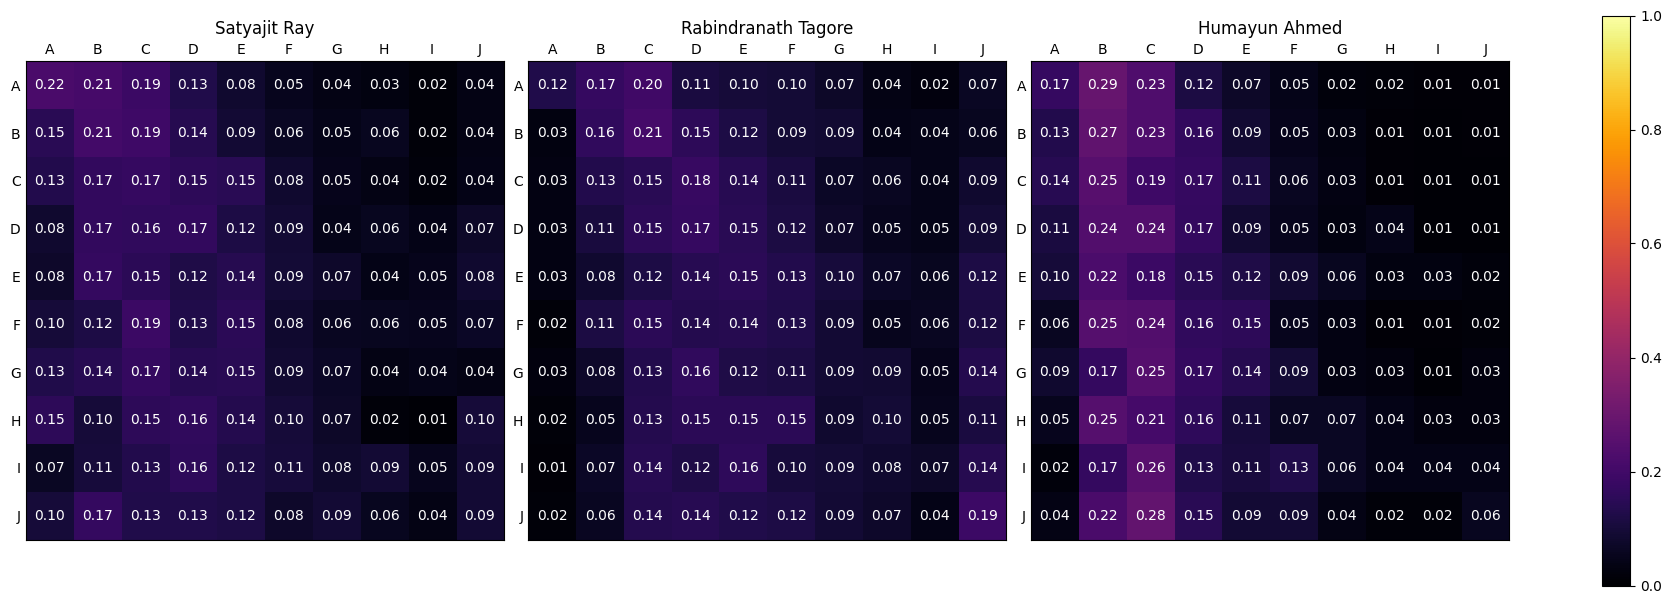

In [46]:
matrix1 = showA(lenarr1[0])
matrix2 = showA(lenarr2[0])
matrix3 = showA(lenarr3[0])
state_matrix_two(matrix1, matrix2, matrix3, cmi=1)

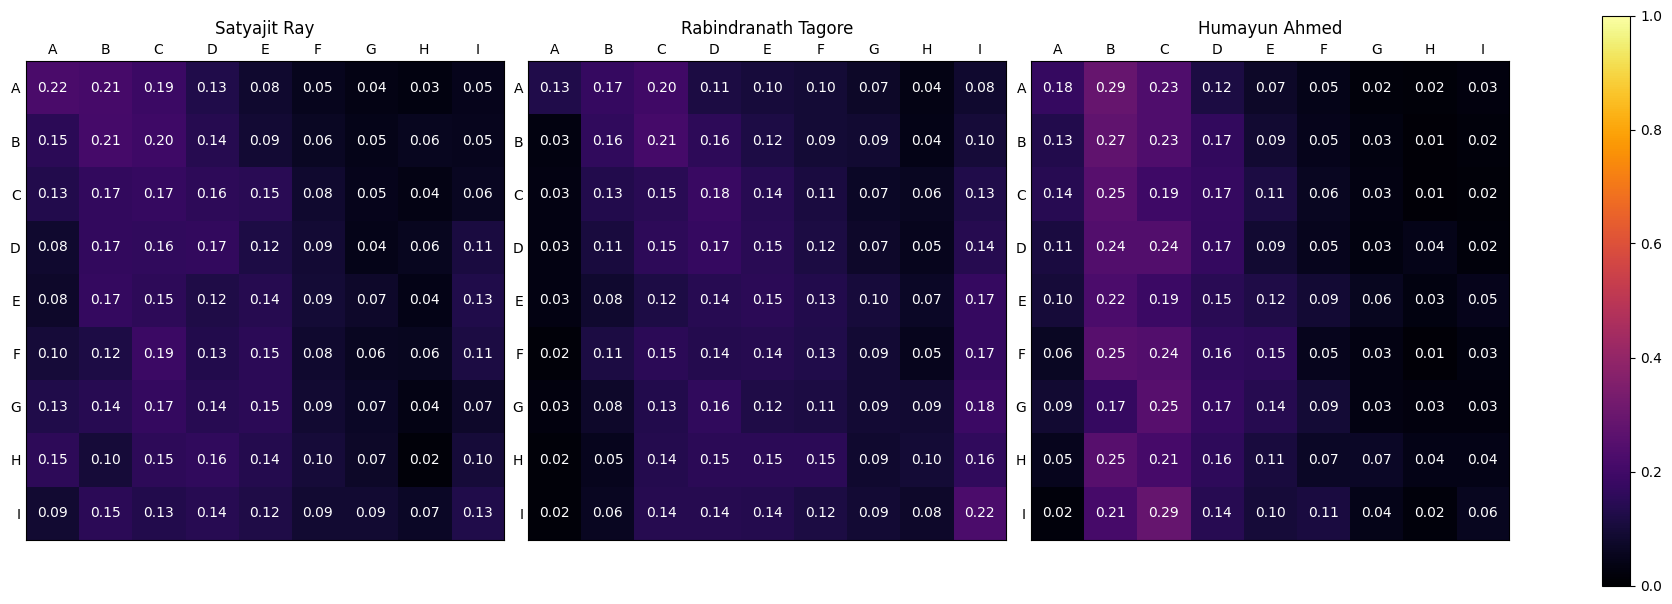

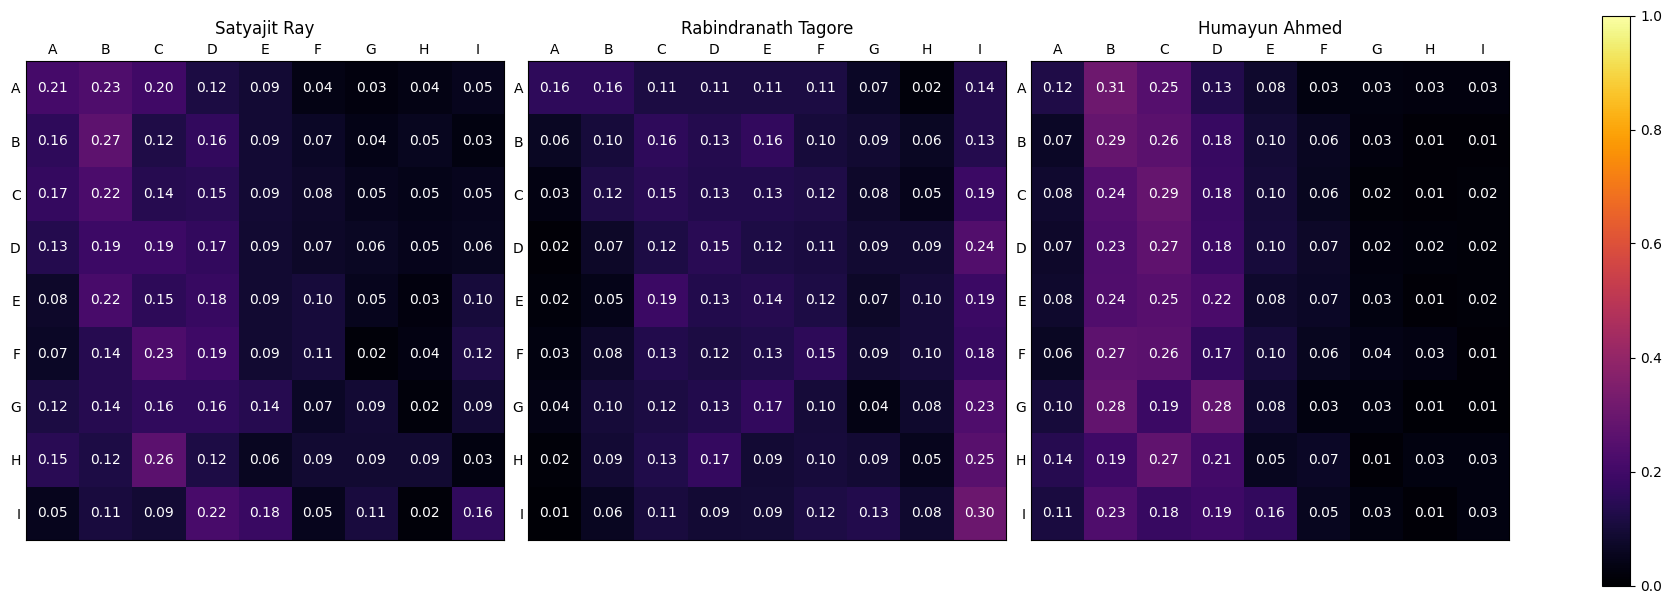

<---------------ENDED----------->


In [148]:
# N is the number of comparision you want to see
N = 3

# number of states
states = 9
d = 2
for i in range(N):
    if i == 2:
        pass
    else:
        path = f'/kaggle/working/Sentence/output_matrix_{i}.png'
        matrix1 = showA(lenarr1[i], states, d)
        matrix2 = showA(lenarr2[i], states, d)
        matrix3 = showA(lenarr3[i], states, d)
        state_matrix_two(matrix1, matrix2, matrix3, cmi=1, n=states)
    
print('<---------------ENDED----------->')

## List of Common Marker Options in Matplotlib

1. `.` - Point marker
2. `,` - Pixel marker
3. `o` - Circle marker
4. `v` - Triangle Down marker
5. `^` - Triangle Up marker
6. `<` - Triangle Left marker
7. `>` - Triangle Right marker
8. `1` - Tri Down marker
9. `2` - Tri Up marker
10. `3` - Tri Left marker
11. `4` - Tri Right marker
12. `s` - Square marker
13. `p` - Pentagon marker
14. `*` - Star marker
15. `h` - Hexagon1 marker
16. `H` - Hexagon2 marker
17. `+` - Plus marker
18. `x` - X marker
19. `D` - Diamond marker
20. `d` - Thin Diamond marker


<div style="text-align: center;" color='blue'>
    <h4> 3.4.3 Plot the Relation of the State Matrix </h4>
</div>

In [53]:
paths = []
for dirname, _, filenames in os.walk('/kaggle/input/bookscollection/Rabindranath_Novels_all'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
paths[:10]

['/kaggle/input/bookscollection/Rabindranath_Novels_all/JogaJog-1929.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/Choturongo-1916.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/NoukaDubi1906.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/ShesherKobita-1929.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/ChokherBali1903.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/ProjapotirNirbondho1908.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/Maloncho-1934.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/Rajorshee-1887.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/CharOddhay1934.txt',
 '/kaggle/input/bookscollection/Rabindranath_Novels_all/GhoreBaire-1916.txt']

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(array):
    '''
    Returns the cosine Similarity Between the First book and All the other books
    '''
    cosine_similarity_score = []
    for i in range(1, len(array)):
        mat1 = showA(array[0],  states, d)
        mat2 = showA(array[i],  states, d)
        # Reshape matrices into 1-D arrays before calculating cosine similarity
        cosine_similarity_score.append(cosine_similarity(mat1.reshape(1, -1), mat2.reshape(1, -1))[0, 0])
    return cosine_similarity_score


In [149]:
sim_arr1 = get_cosine_similarity(lenarr1)
sim_arr2 = get_cosine_similarity(lenarr2)
sim_arr3 = get_cosine_similarity(lenarr3)

In [150]:
def scatter_plot_with_lines(*arrays, save_path = None):
    '''
    Create subplots with scatter points and lines connecting them for multiple arrays.
    '''
    max_length = max(len(arr) for arr in arrays)
    tnames = ['Feluda Series Satyajit Ray', 'Novels of Rabindranath Tagore', 'Himu Series Humayun Ahmed']
    marks = ['o', 'x', '*']
    colors = ['coral', 'blue', 'red']

    fig, axs = plt.subplots(1, len(arrays), figsize=(18, 6), sharey=True)

    for i, (array, ax, color) in enumerate(zip(arrays, axs, colors)):
        x_values = list(range(1, len(array) + 1))
        ax.scatter(x_values, array, label=f'{tnames[i]}', marker=marks[i], color=color)
        ax.plot(x_values, array, linestyle='-', color=color)
        ax.set_xlabel('Book Number')
        ax.set_title(f'{tnames[i]}')
        ax.set_ylim([0.5, 1])

    axs[0].set_ylabel('Cosine Similarity')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)  
    plt.show()


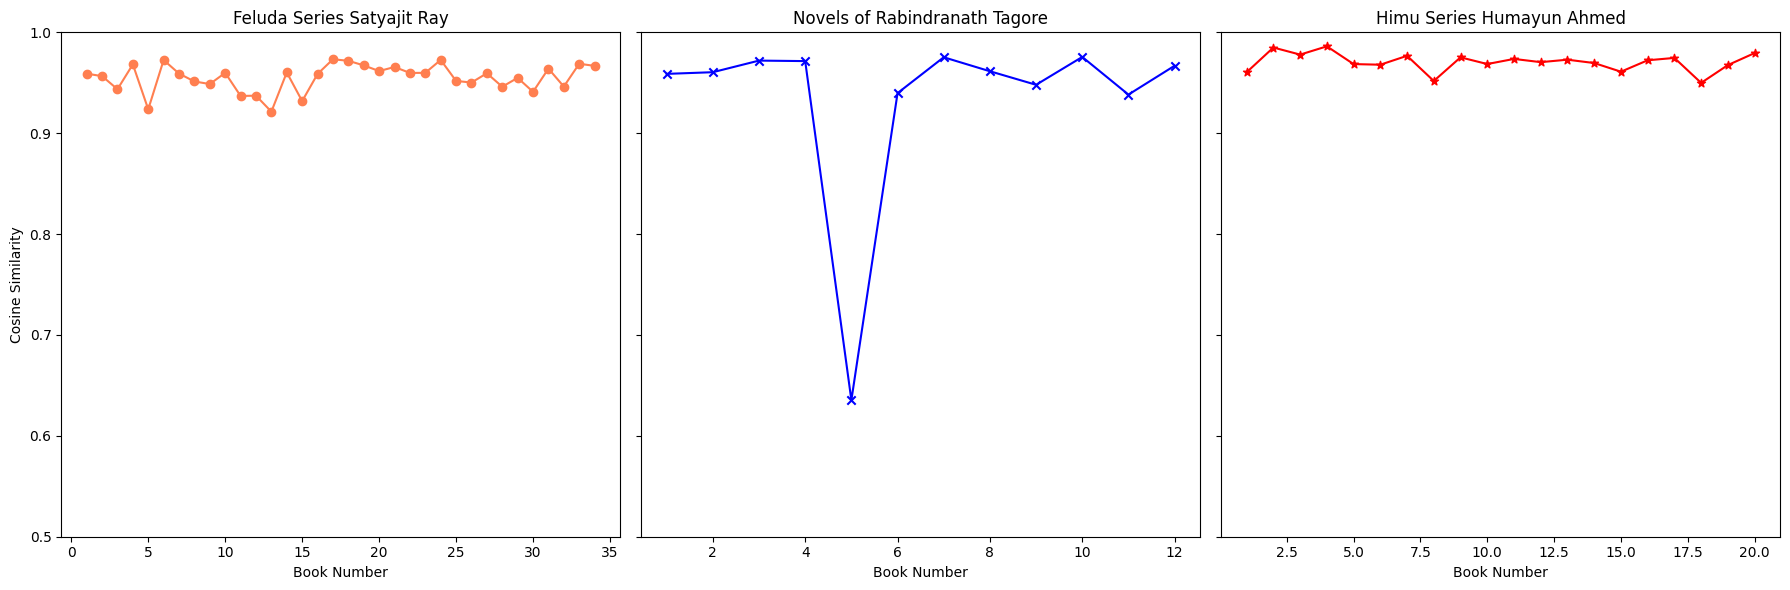

In [151]:
# Example usage:
scatter_plot_with_lines(sim_arr1, sim_arr2, sim_arr3, save_path = '/kaggle/working/Sentence/sentence_matrix_corelation.png')

<div style="background-color: lightcoral; padding: 15px; border-radius: 5px; margin-bottom: 10px; text-align: center;">

 ### Now I need to make the DataFrame Adding these features.

</div>

In [93]:
def book_list(path):
    '''
    Returns the book list of in a directory
    '''
    # Create all the book names list
    np.random.seed(42)
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(filename.replace('.txt', '')))
    return paths

In [97]:
sr_book_list = book_list('/kaggle/input/bookscollection/Feluda all copy')
rt_book_list = book_list('/kaggle/input/bookscollection/Rabindranath_Novels_all')
ha_book_list = book_list('/kaggle/input/bookscollection/Himu_all')

### First For Satyajit Ray

In [124]:
srdata = pd.DataFrame(
{
    'book_id' : sr_book_list,
    'writer': 'Satyajit Ray'
})
srdata.head()

,book_id,writer
0,feluda_33_Noyon_Rahashya,Satyajit Ray
1,feluda_22_OmborSen_Ontordhan_Rahashya,Satyajit Ray
2,feluda_13_Bombayer_Bombete,Satyajit Ray
3,feluda_12_Ghurghutiar_Ghotona,Satyajit Ray
4,feluda_19_JotoKando_Kathmandute,Satyajit Ray


In [118]:
# Set the Value of states and difference
states_n_dif = [[5,3],[2,10], [3,10], [3,8], [3,6], [4,4], [5,2], [6,3], [7,3], [7,2], [8,3], [10,2]]
states = 3
d = 5

In [99]:
# Satyajit Ray
st_matArr1 = []
for i in range(len(lenarr1)):
    st_matArr1.append(stationary_state(showA(lenarr1[i], states, d)))
    
state_mat1 = []
for i in range(len(lenarr1)):
    state_mat1.append(showA(lenarr1[i], states, d))
    


Books Of SR = 35,  Books Of RT = 13, Books Of HA = 21


In [102]:
# state_mat1

,book_id,writer
0,feluda_33_Noyon_Rahashya,Satyajit Ray
1,feluda_22_OmborSen_Ontordhan_Rahashya,Satyajit Ray
2,feluda_13_Bombayer_Bombete,Satyajit Ray
3,feluda_12_Ghurghutiar_Ghotona,Satyajit Ray
4,feluda_19_JotoKando_Kathmandute,Satyajit Ray


In [120]:
data[f'states_mat{states}x{d}'] = state_mat1
data.head(2)

,book_id,state_mat3x3,st_state3x5,writer,states_mat3x5
0,feluda_33_Noyon_Rahashya,"[[0.47712, 0.33333, 0.18954], [0.34691, 0.3481...","[0.39263041099045437, 0.34602963200461584, 0.2...",Satyajit Ray,"[[0.47712, 0.33333, 0.18954], [0.34691, 0.3481..."
1,feluda_22_OmborSen_Ontordhan_Rahashya,"[[0.51258, 0.31132, 0.1761], [0.42292, 0.35178...","[0.43759546542098343, 0.3492712879534685, 0.21...",Satyajit Ray,"[[0.51258, 0.31132, 0.1761], [0.42292, 0.35178..."


In [ ]:
    
st_matArr2 = []
for i in range(len(lenarr2)):
    st_matArr2.append(stationary_state(showA(lenarr2[i], states, d)))
st_matArr3 = []
for i in range(len(lenarr3)):
    st_matArr3.append(stationary_state(showA(lenarr3[i], states, d)))
    
print(f'Books Of SR = {len(st_matArr1)},  Books Of RT = {len(st_matArr2)}, Books Of HA = {len(st_matArr3)}')

<div style="text-align: center; background-color: lightgreen;padding: 45px; border-radius: 5px; margin-bottom: 10px;">
    <h2> Now Discover the Punctuation Pattern </h2>
    <h4> At First Necessary Functions </h4>
</div>

In [ ]:
# List of Punctuation we are considering
plist = ['।', ',', '?', '!']


def make_punctuations(content):
    '''
    Takes a full story of a book or Multiple Books
    And convert it into a list of punctuations.
    '''
    flist = []
    for text in content:
        if text in plist:
            flist.append(text)
    return flist

def read_stories_forPunc(paths):
    '''
    Read All the stories from a folder and return an array of Punctuations.
    '''
    puncs = []
    for path in paths:
        # File path with Bengali characters
        file_path_bangla = path
        # Open the file using triple quotes around the file path
        with open(f"""{file_path_bangla}""", 'r', encoding='utf-8') as file:
            content = file.read()
        sent = make_punctuations(content)
        puncs.append(sent)
    # Convert the 2d array into 1d array
#     ments = [element for row in sents for element in row]
    return puncs

def catpun(x):
    '''
    Changes A punctuations to an assumed category.
    '''
    if x == '।':
        x = 0
    elif x == '?':
        x = 1
    elif x == '!':
        x = 2
    else:
        x = 3
    return x

In [ ]:
puncat = {
    "Punc_category": ["।", "?", "!", ","],
    "label": [0, 1, 2, 3],
    'State': ['A', 'B', 'C', 'D']
}
labeldf = pd.DataFrame(puncat)
labeldf

<div style="text-align: center; background-color: lightblue;padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3> First Plot the Sequence of Punctuation in line Plot  </h3>
</div>

In [ ]:
def igenmatrix_Punc(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 4
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catpun(rff[i])
        second_ind = catpun(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    
    # Transpose of the matrix
    AT = rnd_A.T
    
    # Identity matrix
    identity_matrix = np.eye(n)

    # Subtract identity matrix from the transposed matrix
    ATI = AT - identity_matrix
    
    return ATI

def PuncRank(matrix):
    '''
    Returns the stationary matrix for a given Sentence length Array.
    '''
    # Create a new matrix with the last column replaced
    new_column = np.array([1, 1, 1, 1])
    modified_matrix = matrix.copy()
    modified_matrix[-1] = new_column
    #print(modified_matrix)
    
    # Right-hand side vector of the given equations
    b = np.array([0, 0, 0, 1])
    # Solve the system of equation now
    solution = np.linalg.solve(modified_matrix, b)
    solution = np.round(solution, decimals=2)
    
    return solution


def Punc_showA(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 4
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catpun(rff[i])
        second_ind = catpun(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    return rnd_A

In [ ]:
def create_punc_array(path):
    '''
    Chill 2
    '''
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))

    puncarr = read_stories_forPunc(paths)
    return puncarr

pncarr1 = create_punc_array('/kaggle/input/bookscollection/Feluda all copy')
pncarr2 = create_punc_array('/kaggle/input/bookscollection/Rabindranath_Novels_all')
pncarr3 = create_punc_array('/kaggle/input/bookscollection/Himu_all')

In [ ]:
len(pncarr1), len(pncarr2), len(pncarr3)

In [ ]:
pn_matArr1 = []
for i in range(len(pncarr1)):
    pn_matArr1.append(PuncRank(igenmatrix_Punc(pncarr1[i])))
pn_matArr2 = []
for i in range(len(pncarr2)):
    pn_matArr2.append(PuncRank(igenmatrix_Punc(pncarr2[i])))
pn_matArr3 = []
for i in range(len(pncarr3)):
    pn_matArr3.append(PuncRank(igenmatrix_Punc(pncarr3[i])))

In [ ]:
# Create a DataFrame with two columns
resdf = pd.DataFrame({'Writter 1': pn_matArr1[:13], 'Writter 2': pn_matArr2, 'Writer 3': pn_matArr3[:13]})
resdf

In [ ]:
print(f'Writter 1 --> {calculate_avg(pn_matArr1)}')
print(f'Writter 2 --> {calculate_avg(pn_matArr2)}')
print(f'Writer 3 --> {calculate_avg(pn_matArr3)}')

<div style="text-align: center; background-color: lightblue;padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3> First Plot the Sequence of Punctuation in line Plot  </h3>
</div>

In [ ]:
def puntonum(x):
    '''
    Changes A punctuations to an assumed category.
    '''
    if x == '।':
        x = 1
    elif x == '?':
        x = 2
    elif x == '!':
        x = 3
    elif x == ',':
        x = 4
    return x

def kinamdebo(array):
    tarray = []
    for ind in range(0, len(array)):
        tarray.append(puntonum(array[ind]))
    return tarray

def sequence_of_punctuations(*arrays, save_path=None):
    '''
    Create a subplot with two line plots
    '''
    
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(20,8))
    clr = ['r', 'orange', 'blue', 'green']
    sizes = [10000, 40000, 20000, 4000]
    # Plot the Line plot using a loop
    for j, array in enumerate(arrays):
        for i, value in enumerate(tqdm(array)):
            axes[j].scatter(i, 1, color= clr[value-1], marker='|', s=sizes[value-1])
            axes[j].set_xlabel('SEQUENCE', fontsize=12)
            axes[0].set_ylabel('PUNCTUATION', fontsize=12)
            axes[j].set_yticks([0.5, 1, 1.5])
            axes[0].set_title('Punctuation Sequence Plot', fontsize=18)
            axes[2].set_title('Punctuation Sequence Plot', fontsize=18)
            # Plot the first line plot in the first subplot
            # axes[0].set_title('Sentence Length in SR')

    
    # Create custom legend handles and labels
    custom_handles = [plt.Rectangle((0, 0), 1, 1, color='red', linewidth=2), 
                      plt.Rectangle((0, 0), 1, 1, color='orange', linewidth=2),
                      plt.Rectangle((0, 0), 1, 1, color='blue', linewidth=2),
                      plt.Rectangle((0, 0), 1, 1, color='green', linewidth=2),
                  ]
    legend_labels = ['Period', 'Question', 'Exclamatory', 'Comma']

    # Add the legend to the figure
    fig.legend(custom_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.51, .96),
           ncol=4, prop={'size': 15})
    
    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [ ]:
pncarr1[0][:10]

In [ ]:
pr = kinamdebo(pncarr1[0])
pr[:10]

In [ ]:
# N is the number of comparision you want to see
N = 10
ll = 20
for i in range(N):
    path = f'/kaggle/working/Punctuation/punctuation_seq_plot_{i+1}.png'
    matrix1 = kinamdebo(pncarr1[i])
    matrix2 = kinamdebo(pncarr2[i])
    matrix3 = kinamdebo(pncarr3[i])
    print(len(matrix1), len(matrix2), len(matrix3))
#     sequence_of_punctuations(matrix1, matrix2, matrix3, save_path = path)
#     sequence_of_punctuations(matrix1[:ll], matrix2[:ll], matrix3[:ll], save_path=path)
    
print('<---------------ENDED----------->')

In [ ]:
def state_matrix_punc(mat1, mat2, mat3, cmi = 1, save_path = None):
    '''
    Plots Difference of The Heatmap of The State Matrix of Two different Writters. 
    '''
    # cmaps that i want to use
    cmaps = ['viridis', 'inferno', 'plasma', 'cividis']
    fig, axes = plt.subplots(1, 3, figsize=(19, 6), gridspec_kw={'width_ratios': [1, 1, 1]})
    plt.subplots_adjust(wspace = .8) 
    
    im1 = axes[0].matshow(mat1, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[0].set_title('Satyajit Ray')

    im2 = axes[1].matshow(mat2, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[1].set_title('Rabindranath Tagore')
    
    im3 = axes[2].matshow(mat3, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[2].set_title('Humayun Ahmed')
    
    rownum = 4
#     # Add text annotations
    for i in range(rownum):
        for j in range(rownum):
            axes[0].text(j, i, f'{matrix1[i, j]:.2f}', ha="center", va="center", color="w")
            axes[1].text(j, i, f'{matrix2[i, j]:.2f}', ha="center", va="center", color="w")
            axes[2].text(j, i, f'{matrix3[i, j]:.2f}', ha='center', va='center', color='w')

    for ax in axes:
        ax.set_xticks(np.arange(rownum))
        ax.set_yticks(np.arange(rownum))
        ax.set_xticklabels(['[ | ]', '[ ? ]', '[ ! ]', '[ , ]'])
        ax.set_yticklabels(['[ | ]', '[ ? ]', '[ ! ]', '[ , ]'])
        ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.colorbar(im1, ax=axes)
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [ ]:
# N is the number of comparision you want to see
N = 5
for i in range(N):
    path = f'/kaggle/working/Punctuation/punc_matrix_plot_{i+1}.png'
    matrix1 = Punc_showA(pncarr1[i])
    matrix2 = Punc_showA(pncarr2[i])
    matrix3 = Punc_showA(pncarr3[i])
    state_matrix_punc(matrix1, matrix2, matrix3, cmi=1, save_path=path)
    
print('<---------------ENDED----------->')

<div style="text-align: center; background-color: lightblue;padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h2> Now Plot the Corelation Graph of the matrix </h2>
</div>

In [ ]:
def punc_cosine_similarity(array):
    '''
    Returns the cosine Similarity Between the First book and All the other books
    '''
    cosine_similarity_score = []
    for i in range(1, len(array)):
        mat1 = Punc_showA(array[0])
        mat2 = Punc_showA(array[i])
        # Reshape matrices into 1-D arrays before calculating cosine similarity
        cosine_similarity_score.append(cosine_similarity(mat1.reshape(1, -1), mat2.reshape(1, -1))[0, 0])
    return cosine_similarity_score


In [ ]:
sim_arr1 = punc_cosine_similarity(pncarr1)
sim_arr2 = punc_cosine_similarity(pncarr2)
sim_arr3 = punc_cosine_similarity(pncarr3)
len(sim_arr1), len(sim_arr2), len(sim_arr3)

In [ ]:
# Example usage:
scatter_plot_with_lines(sim_arr1, sim_arr2, sim_arr3, save_path = '/kaggle/working/Punctuation/punc_matrix_corelation.png')

<div style="background-color: lightblue; padding: 15px; border-radius: 5px; margin-bottom: 10px; text-align: center;">

 ### 3.4.5 Stationary State Corelation

</div>

In [ ]:
print(len(pn_matArr1), len(pn_matArr2), len(pn_matArr3))

In [ ]:
sim_ar1 = get_cosine_similarity2(pn_matArr1)
sim_ar2 = get_cosine_similarity2(pn_matArr2)
sim_ar3 = get_cosine_similarity2(pn_matArr3)
len(sim_ar1), len(sim_ar2), len(sim_ar3)

In [ ]:
# Example usage:
scatter_plot_with_lines(sim_ar1, sim_ar2, sim_ar3, save_path = '/kaggle/working/Punctuation/punc_state_corelation.png')

In [ ]:
# Define number of steps as n
n = 4
# Define k for iterations
k = 6

def plot_the_change_punc(prob1, prob2, prob3, save_path = None):
    x_values = np.array(list(range(1,k+1)))
    labels = ['|', '?', '!', ',']
#     labels = ['A', 'B', 'C', 'D']
    fig, axs = plt.subplots(1, 3, figsize=(18, 9))  
    ylm = 0.8
    
    # Plot first set of prob
    for i in range(len(prob1)):
        axs[0].plot(x_values, prob1[i], marker='o', linestyle='-', label=labels[i], markersize=8)
    axs[0].set_title('Satyajit Roy' )
    axs[0].set_xlabel('No Of Iteration')
    axs[0].set_ylabel('Probabilities')
#     axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[0].set_ylim([0, ylm])

    # Plot second set of prob
    for i in range(len(prob2)):
        axs[1].plot(x_values, prob2[i], marker='D', linestyle='-', label=labels[i], markersize=6)
    axs[1].set_title('Rabindranath Tagore')
    axs[1].set_xlabel('No Of Iteration')
    axs[1].set_ylabel('Probabilities')
#     axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[1].set_ylim([0, ylm])
    
    # Plot second set of prob
    for i in range(len(prob3)):
        axs[2].plot(x_values, prob3[i], marker='*', linestyle='-', label=labels[i], markersize=10)
    axs[2].set_title('Humayun Ahmaed')
    axs[2].set_xlabel('No Of Iteration')
    axs[2].set_ylabel('Probabilities')
#     axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[2].set_ylim([0, ylm])
    
    # Create a single legend in the middle subplot
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=n, prop={'size': 15})


    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [ ]:
nit = 4
for i in range(nit):
    path = f'/kaggle/working/Punctuation/punc_stState_plot_{i+1}.png'
    array = Punc_showA(pncarr1[i])
    array2 = Punc_showA(pncarr2[i])
    array3 = Punc_showA(pncarr3[i])
    plot_the_change_punc(track_the_change(array), track_the_change(array2), track_the_change(array3), save_path=path)

<div style="background-color: orange; padding: 15px; border-radius: 5px; margin-bottom: 10px; text-align: center;">

 ### Download All the Files From the Working Directory

</div>

In [ ]:

# Path to the zip file you want to delete
zip_file_path = "/kaggle/working/files.zip"

# Check if the file exists before attempting to delete it
if os.path.exists(zip_file_path):
    os.remove(zip_file_path)
    print(f"The file '{zip_file_path}' has been deleted.")
else:
    print(f"The file '{zip_file_path}' does not exist.")


In [ ]:

# Path to your working directory
working_directory = "/kaggle/working"

# List all files in the working directory
files = os.listdir(working_directory)

# Create a zip file
with zipfile.ZipFile("/kaggle/working/files.zip", "w") as zip_ref:
    # Add all files to the zip file
    for file in files:
        file_path = os.path.join(working_directory, file)
        zip_ref.write(file_path, os.path.basename(file_path))
